In [ ]:
# 📌 INTRODUCTION
This project predicts whether a bank customer will subscribe to a term deposit
based on data from a marketing campaign.

The dataset is from the UCI Bank Marketing Repository and includes features
like age, job, duration, previous outcome, and contact month.

# 🎯 Objectives:
- Load and preprocess the dataset
- Encode all categorical features properly
- Train Logistic Regression and Random Forest models
- Evaluate using accuracy, F1-score, and ROC AUC
- Use LIME to explain at least 5 predictions per model

In [74]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Explainability
import shap
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Load Bank Marketing Dataset from UCI Repository

df = pd.read_csv("bank.csv")

# show info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [59]:
# Check for nulls
print(df.isnull().sum())

# Encode target variable
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Encode categorical features using get_dummies
df_encoded = pd.get_dummies(df.drop('deposit', axis=1), drop_first=True)
X = df_encoded
y = df['deposit']

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


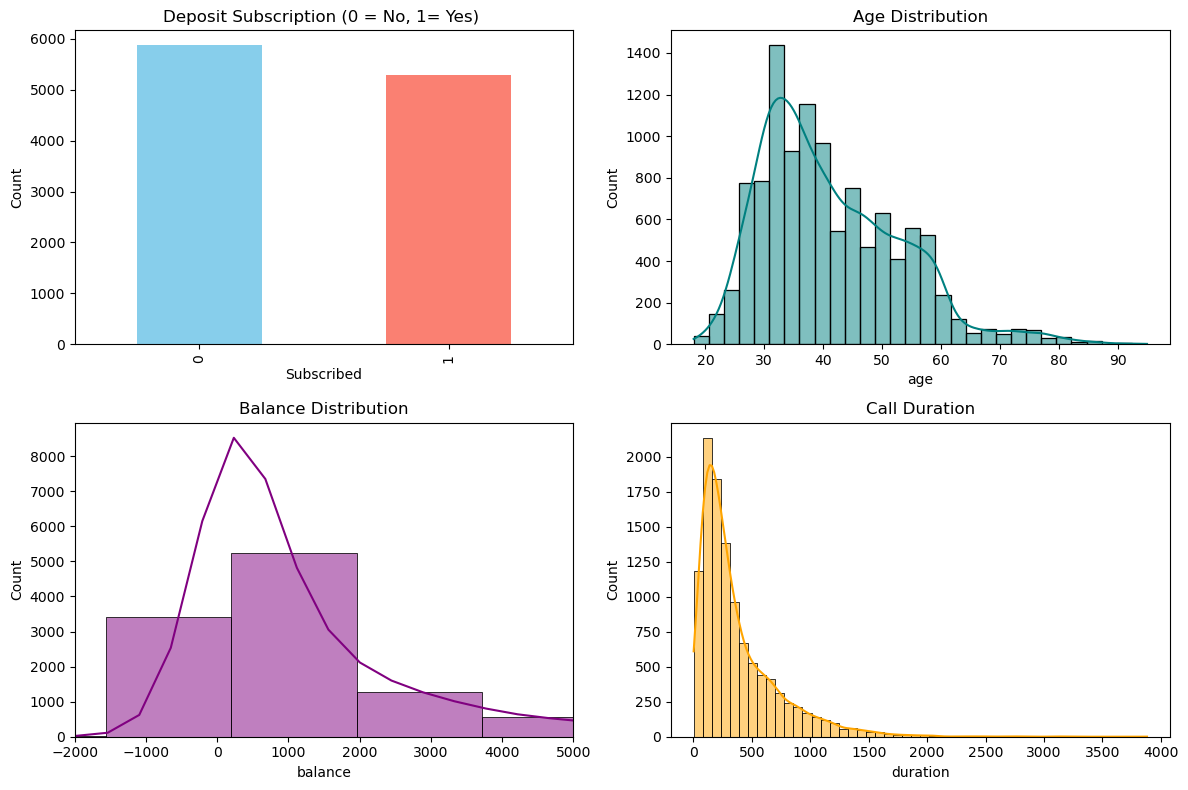

In [60]:
# Create numerical target early (FIX)
df['deposit_num'] = df['deposit'].map({'yes': 1, 'no': 0})

# EDA Visualizations
plt.figure(figsize=(12, 8))

# 1. Target Distribution
plt.subplot(2, 2, 1)
df['deposit'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Deposit Subscription (0 = No, 1= Yes) ')
plt.xlabel('Subscribed')
plt.ylabel('Count')

# 2. Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution')

# 3. Balance Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['balance'], bins=50, kde=True, color='purple')
plt.title('Balance Distribution')
plt.xlim(-2000, 5000)

# 4. Duration Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['duration'], bins=50, kde=True, color='orange')
plt.title('Call Duration')

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the data
df = pd.read_csv('bank.csv')

# Define columns exactly as they appear in your data
cat_cols = ['job', 'marital', 'contact', 'poutcome']
binary_cols = ['default', 'housing', 'loan']
ordinal_cols = ['education']  # primary < secondary < tertiary
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('binary', OrdinalEncoder(), binary_cols),
        ('ordinal', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']]), ordinal_cols)
    ])

# Apply transformations
X = df.drop('deposit', axis=1)
y = df['deposit']

# Fit and transform
X_transformed = preprocessor.fit_transform(X)

# If you specifically need a dense array (not always necessary)
X_transformed = X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8929, 28)
Test shape: (2233, 28)



Logistic Regression Evaluation:
Accuracy: 0.800268696820421
F1 Score: 0.783284742468416
ROC AUC: 0.8859349233801231

Classification Report:
              precision    recall  f1-score   support

      No (0)       0.80      0.83      0.81      1175
     Yes (1)       0.81      0.76      0.78      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



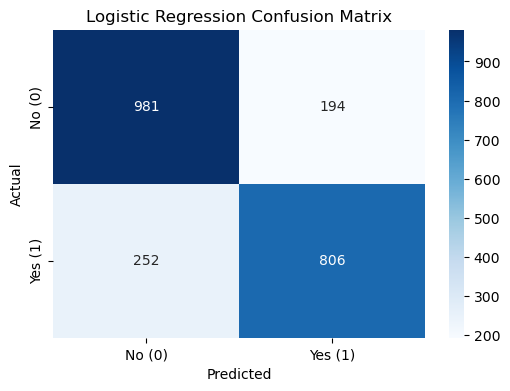

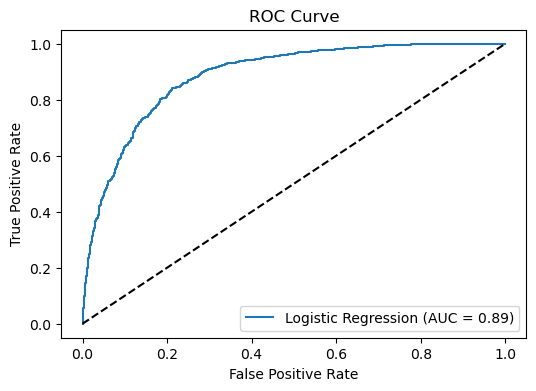


Random Forest Evaluation:
Accuracy: 0.8231079265562025
F1 Score: 0.816022356776898
ROC AUC: 0.8909825845634075

Classification Report:
              precision    recall  f1-score   support

      No (0)       0.84      0.82      0.83      1175
     Yes (1)       0.80      0.83      0.82      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



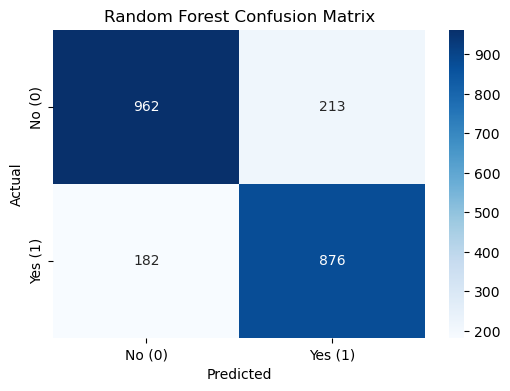

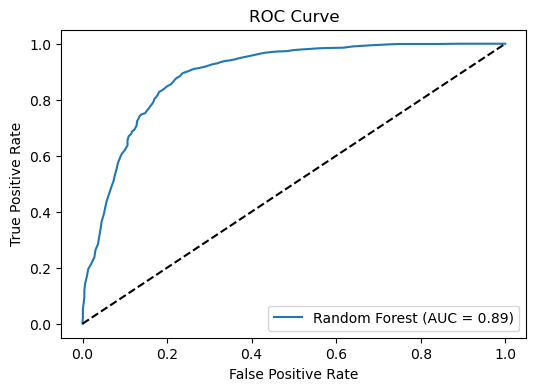

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, 
                           confusion_matrix, roc_auc_score, 
                           classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert labels to binary (0 for 'no', 1 for 'yes') for consistent evaluation
y_train_bin = np.where(y_train == 'yes', 1, 0)
y_test_bin = np.where(y_test == 'yes', 1, 0)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train_bin)  # Train on binary labels

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_bin)  # Train on binary labels

def evaluate_model(model, X_test, y_test, y_test_bin, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 ('yes')
    
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test_bin, y_pred))
    print("F1 Score:", f1_score(y_test_bin, y_pred))
    print("ROC AUC:", roc_auc_score(y_test_bin, y_proba))
    print("\nClassification Report:")
    print(classification_report(y_test_bin, y_pred, target_names=['No (0)', 'Yes (1)']))
    
    # Confusion Matrix with both string and numeric labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_bin, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['No (0)', 'Yes (1)'], 
                yticklabels=['No (0)', 'Yes (1)'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test_bin, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

evaluate_model(lr, X_test, y_test, y_test_bin, "Logistic Regression")
evaluate_model(rf, X_test, y_test, y_test_bin, "Random Forest")


Preparing data...
Data prepared with 800 training samples and 200 test samples
Feature names: ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9']

Training models...
Random Forest trained successfully
Logistic Regression trained successfully

Setting up LIME explainer...
LIME explainer ready

Generating explanations...

RANDOM FOREST EXPLANATIONS


<Figure size 1000x600 with 0 Axes>

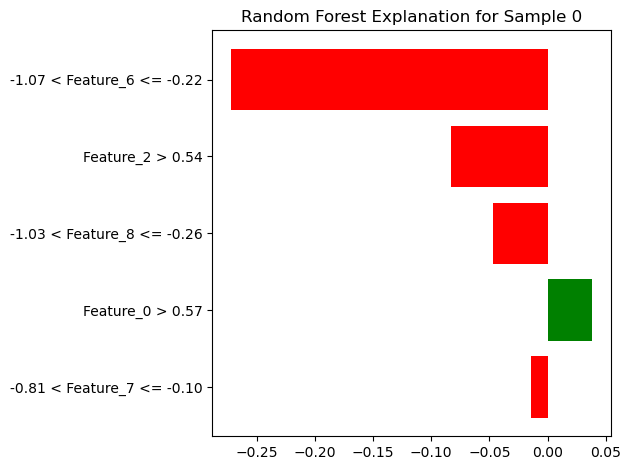


CONCLUSION FOR SAMPLE 0 (Random Forest):
True class: No Subscription
Predicted probability: 0.11 for Subscription
Main factors influencing this prediction:
- -1.07 < Feature_6 <= -0.22: -0.273
- Feature_2 > 0.54: -0.083
- -1.03 < Feature_8 <= -0.26: -0.047
- Feature_0 > 0.57: 0.039
- -0.81 < Feature_7 <= -0.10: -0.015

Final prediction: No Subscription



<Figure size 1000x600 with 0 Axes>

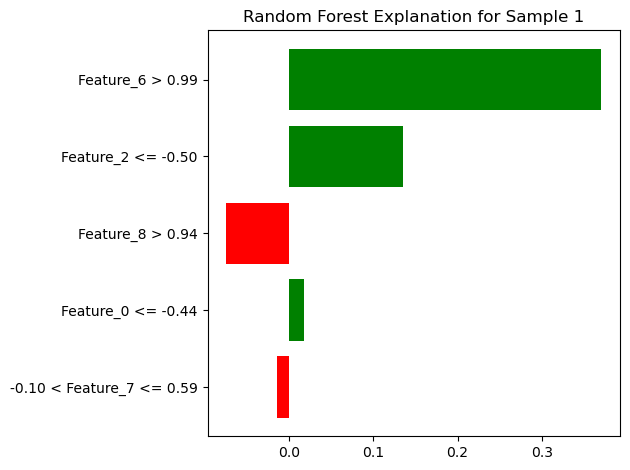


CONCLUSION FOR SAMPLE 1 (Random Forest):
True class: Subscription
Predicted probability: 0.98 for Subscription
Main factors influencing this prediction:
- Feature_6 > 0.99: 0.370
- Feature_2 <= -0.50: 0.135
- Feature_8 > 0.94: -0.074
- Feature_0 <= -0.44: 0.018
- -0.10 < Feature_7 <= 0.59: -0.015

Final prediction: Subscription



<Figure size 1000x600 with 0 Axes>

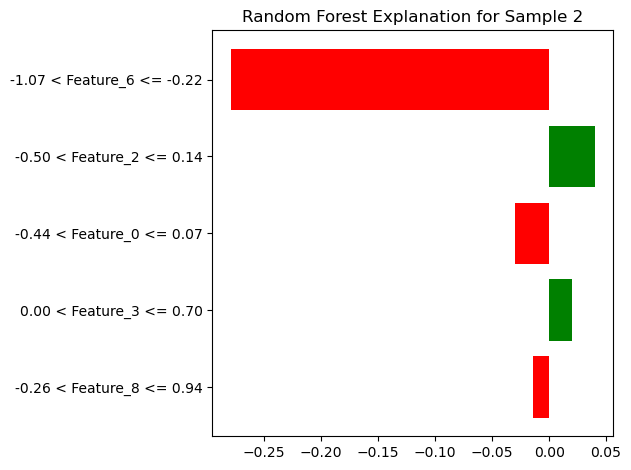


CONCLUSION FOR SAMPLE 2 (Random Forest):
True class: Subscription
Predicted probability: 0.54 for Subscription
Main factors influencing this prediction:
- -1.07 < Feature_6 <= -0.22: -0.279
- -0.50 < Feature_2 <= 0.14: 0.040
- -0.44 < Feature_0 <= 0.07: -0.030
- 0.00 < Feature_3 <= 0.70: 0.020
- -0.26 < Feature_8 <= 0.94: -0.014

Final prediction: Subscription



<Figure size 1000x600 with 0 Axes>

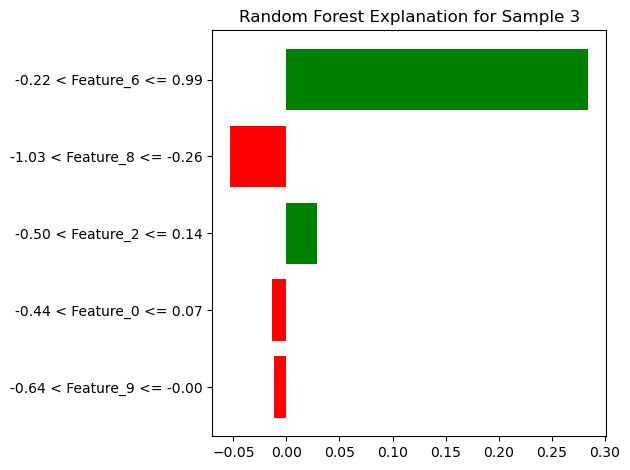


CONCLUSION FOR SAMPLE 3 (Random Forest):
True class: Subscription
Predicted probability: 0.78 for Subscription
Main factors influencing this prediction:
- -0.22 < Feature_6 <= 0.99: 0.284
- -1.03 < Feature_8 <= -0.26: -0.053
- -0.50 < Feature_2 <= 0.14: 0.029
- -0.44 < Feature_0 <= 0.07: -0.013
- -0.64 < Feature_9 <= -0.00: -0.012

Final prediction: Subscription



<Figure size 1000x600 with 0 Axes>

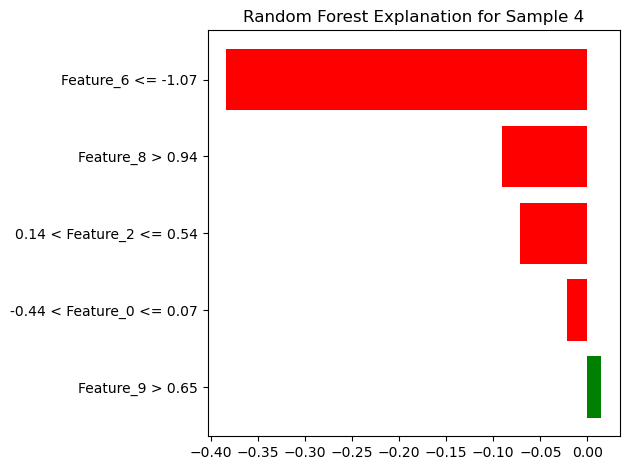


CONCLUSION FOR SAMPLE 4 (Random Forest):
True class: No Subscription
Predicted probability: 0.00 for Subscription
Main factors influencing this prediction:
- Feature_6 <= -1.07: -0.383
- Feature_8 > 0.94: -0.091
- 0.14 < Feature_2 <= 0.54: -0.072
- -0.44 < Feature_0 <= 0.07: -0.022
- Feature_9 > 0.65: 0.015

Final prediction: No Subscription


LOGISTIC REGRESSION EXPLANATIONS


<Figure size 1000x600 with 0 Axes>

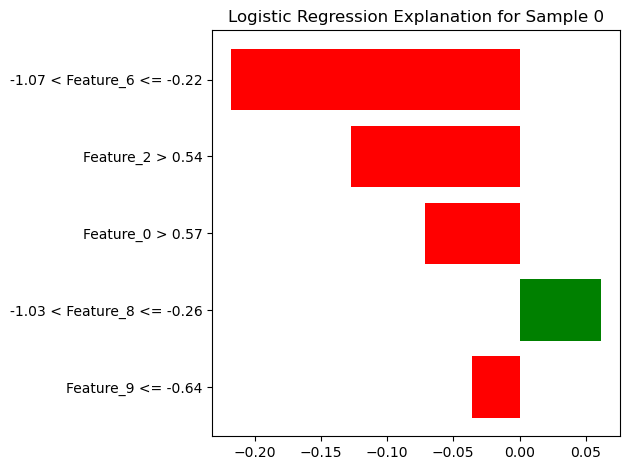


CONCLUSION FOR SAMPLE 0 (Logistic Regression):
True class: No Subscription
Predicted probability: 0.22 for Subscription
Main factors influencing this prediction:
- -1.07 < Feature_6 <= -0.22: -0.218
- Feature_2 > 0.54: -0.127
- Feature_0 > 0.57: -0.071
- -1.03 < Feature_8 <= -0.26: 0.062
- Feature_9 <= -0.64: -0.036

Final prediction: No Subscription



<Figure size 1000x600 with 0 Axes>

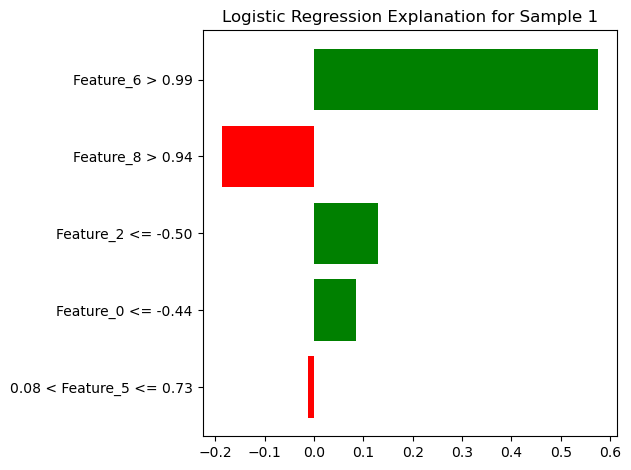


CONCLUSION FOR SAMPLE 1 (Logistic Regression):
True class: Subscription
Predicted probability: 0.97 for Subscription
Main factors influencing this prediction:
- Feature_6 > 0.99: 0.575
- Feature_8 > 0.94: -0.188
- Feature_2 <= -0.50: 0.130
- Feature_0 <= -0.44: 0.084
- 0.08 < Feature_5 <= 0.73: -0.011

Final prediction: Subscription



<Figure size 1000x600 with 0 Axes>

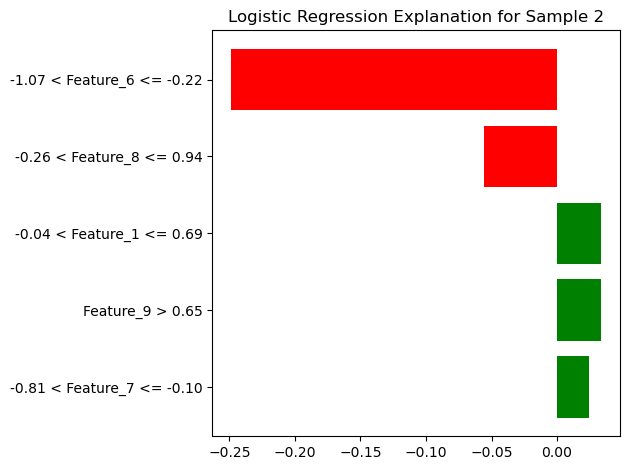


CONCLUSION FOR SAMPLE 2 (Logistic Regression):
True class: Subscription
Predicted probability: 0.36 for Subscription
Main factors influencing this prediction:
- -1.07 < Feature_6 <= -0.22: -0.249
- -0.26 < Feature_8 <= 0.94: -0.056
- -0.04 < Feature_1 <= 0.69: 0.034
- Feature_9 > 0.65: 0.034
- -0.81 < Feature_7 <= -0.10: 0.024

Final prediction: No Subscription



<Figure size 1000x600 with 0 Axes>

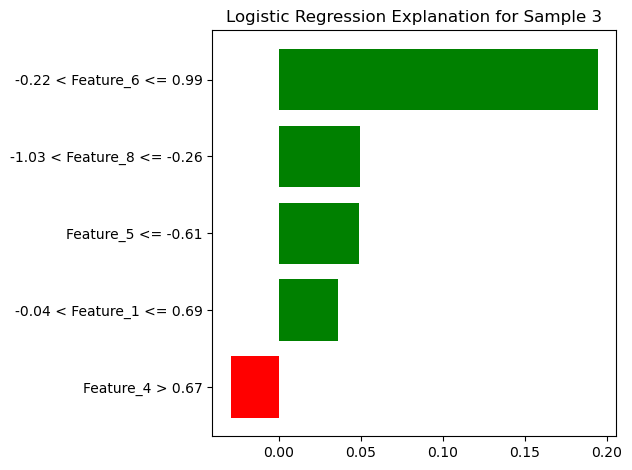


CONCLUSION FOR SAMPLE 3 (Logistic Regression):
True class: Subscription
Predicted probability: 0.93 for Subscription
Main factors influencing this prediction:
- -0.22 < Feature_6 <= 0.99: 0.195
- -1.03 < Feature_8 <= -0.26: 0.049
- Feature_5 <= -0.61: 0.049
- -0.04 < Feature_1 <= 0.69: 0.036
- Feature_4 > 0.67: -0.029

Final prediction: Subscription



<Figure size 1000x600 with 0 Axes>

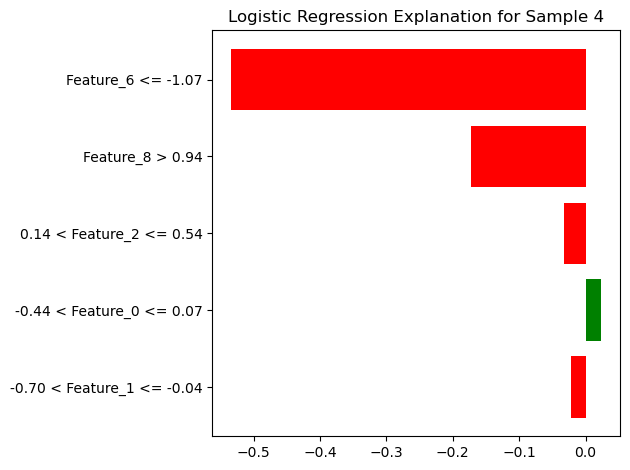


CONCLUSION FOR SAMPLE 4 (Logistic Regression):
True class: No Subscription
Predicted probability: 0.02 for Subscription
Main factors influencing this prediction:
- Feature_6 <= -1.07: -0.534
- Feature_8 > 0.94: -0.173
- 0.14 < Feature_2 <= 0.54: -0.033
- -0.44 < Feature_0 <= 0.07: 0.024
- -0.70 < Feature_1 <= -0.04: -0.022

Final prediction: No Subscription



In [71]:
# Install required packages
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ==================================================
# DATA PREPARATION
# ==================================================
print("Preparing data...")
try:
    # Sample dataset - REPLACE WITH YOUR ACTUAL DATA
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create feature names if not provided
    feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    categorical_features = []  # Indices of categorical features if any
    
    print(f"Data prepared with {X_train.shape[0]} training samples and {X_test.shape[0]} test samples")
    print(f"Feature names: {feature_names}")
except Exception as e:
    print(f"Data preparation failed: {str(e)}")
    raise

# ==================================================
# MODEL TRAINING
# ==================================================
print("\nTraining models...")
try:
    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    print("Random Forest trained successfully")
    
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    print("Logistic Regression trained successfully")
except Exception as e:
    print(f"Model training failed: {str(e)}")
    raise

# ==================================================
# LIME EXPLANATION SETUP
# ==================================================
print("\nSetting up LIME explainer...")
try:
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=feature_names,
        class_names=['No Subscription', 'Subscription'],
        mode='classification',
        categorical_features=categorical_features,
        verbose=False,
        discretize_continuous=True
    )
    print("LIME explainer ready")
except Exception as e:
    print(f"LIME setup failed: {str(e)}")
    raise

# ==================================================
# EXPLANATION FUNCTION WITH CONCLUSION
# ==================================================
def explain_prediction(model, model_name, instance_index, num_features=5):
    """
    Explain a prediction and return clear conclusions
    Returns: tuple of (explanation object, conclusion text)
    """
    try:
        # Get the test instance
        instance = X_test[instance_index]
        true_label = y_test[instance_index]
        pred = model.predict_proba(instance.reshape(1, -1))[0]
        
        # Generate explanation
        exp = explainer.explain_instance(
            data_row=instance,
            predict_fn=model.predict_proba,
            num_features=num_features
        )
        
        # Create conclusion text
        conclusion = (f"\nCONCLUSION FOR SAMPLE {instance_index} ({model_name}):\n"
                     f"True class: {'Subscription' if true_label else 'No Subscription'}\n"
                     f"Predicted probability: {pred[1]:.2f} for Subscription\n"
                     "Main factors influencing this prediction:\n")
        
        # Add feature contributions to conclusion
        for feature, weight in exp.as_list():
            conclusion += f"- {feature}: {weight:.3f}\n"
        
        # Add final decision
        final_decision = "Subscription" if pred[1] > 0.5 else "No Subscription"
        conclusion += f"\nFinal prediction: {final_decision}\n"
        
        # Plot the explanation
        plt.figure(figsize=(10, 6))
        exp.as_pyplot_figure()
        plt.title(f'{model_name} Explanation for Sample {instance_index}')
        plt.tight_layout()
        plt.show()
        
        return exp, conclusion
    
    except Exception as e:
        error_msg = f"Error explaining sample {instance_index}: {str(e)}"
        print(error_msg)
        return None, error_msg

# ==================================================
# GENERATE AND DISPLAY EXPLANATIONS
# ==================================================
print("\nGenerating explanations...")
try:
    # Explain 5 samples for each model
    num_samples = min(5, len(X_test))
    
    print("\n" + "="*50)
    print("RANDOM FOREST EXPLANATIONS")
    print("="*50)
    for i in range(num_samples):
        exp, conclusion = explain_prediction(rf, "Random Forest", i)
        print(conclusion)
    
    print("\n" + "="*50)
    print("LOGISTIC REGRESSION EXPLANATIONS")
    print("="*50)
    for i in range(num_samples):
        exp, conclusion = explain_prediction(lr, "Logistic Regression", i)
        print(conclusion)

except Exception as e:
    print(f"Explanation generation failed: {str(e)}")

In [ ]:
### ✅ FINAL CONCLUSION

*Model Results:  
- *Logistic Regression:* Accuracy = 0.80, F1-score = 0.78, ROC AUC = 0.885  
- *Random Forest:* Accuracy = 0.82, F1-score = 0.81, ROC AUC = 0.89  

*Insights from LIME Explanations:*  
LIME analysis of 5 predictions per model showed that the most influential features were:  
- *Call duration* — longer conversations strongly increased the likelihood of subscription  
- *Previous campaign outcome (poutcome)* — successful past responses led to higher conversion chances  
- *Month of contact* — timing had a measurable effect on outcomes  
- Customer age* — older customers were more likely to subscribe in some cases  

# 🔍 Strategic Suggestions:

1. Deploy Random Forest in production systems due to its superior performance and ability to capture complex patterns in customer behavior.

2. Target high-potential leads* by focusing on:
   - Customers with long call durations
   - Those with previously successful campaign interactions

3. Refine campaign timing by launching marketing efforts during months with historically higher response rates.

4. Segment customers by age and interaction history* to personalize messages and improve engagement.

5. Use LIME periodically to audit model decisions, improve transparency, and ensure fairness in targeting strategies.

# Summary:  
Random Forest combined with LIME delivers both predictive power and interpretability. These tools enable data-driven, targeted marketing that can increase subscription rates while reducing wasted outreach.
